# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [79]:
# Initial imports
import os
import json
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from pandas.io.json import json_normalize

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aduri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [83]:
# Read your api key environment variable
from newsapi import NewsApiClient
#api_key = os.getenv("news_api")
api_key='da779c4c629d476eadf322a89246525e'

In [84]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [85]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy',
                                      )
btc_headlines

{'status': 'ok',
 'totalResults': 9325,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
   'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
   'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
   'publishedAt': '2021-02-08T14:01:09Z',
   'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'},
  {'source': {'id': 'the-verge', 'name': 'T

In [86]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_top_headlines(q="eth", language="en", country="us")
eth_headlines

{'status': 'ok',
 'totalResults': 1,
 'articles': [{'source': {'id': None, 'name': 'NPR'},
   'author': 'Rachel Treisman',
   'title': "Proud Boys' Alleged Preparation For Capitol Riot Detailed In New Court Filing - NPR",
   'description': 'A federal court filing details how Ethan Nordean allegedly recruited members and raised money ahead of the Jan. 6 attack, which prosecutors say he helped coordinate and lead.',
   'url': 'https://www.npr.org/2021/03/02/972895521/prosecutors-proud-boys-gave-leader-war-powers-planned-ahead-for-capitol-riot',
   'urlToImage': 'https://media.npr.org/assets/img/2021/03/02/ap_21039721090052_wide-c0c457552b818b30552bc37fd4bba4de59f55005.jpg?s=1400',
   'publishedAt': '2021-03-02T21:00:22Z',
   'content': 'Ethan Nordean, with backward baseball hat and bullhorn, leads members of the far-right group Proud Boys before the riot at the U.S. Capitol on Jan. 6. The self-described sergeant-at-arms of the Seatt… [+10403 chars]'}]}

In [87]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(btc_headlines["articles"])

btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,"Tesla buys $1.5 in Bitcoin, will soon accept i...",Elon Musk’s cryptocurrency hype was more than ...,https://www.engadget.com/tesla-to-take-bitcoin...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-02-08T14:01:09Z,Elon Musks cryptocurrency hype was more than j...
1,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma,Tesla’s $1.5 billion bitcoin purchase clashes ...,Tesla announced this week that it purchased $1...,https://www.theverge.com/2021/2/9/22275243/tes...,https://cdn.vox-cdn.com/thumbor/eQST6cDSwG_MAS...,2021-02-09T23:10:46Z,"Tesla, led by Elon Musk, confirmed that it pur..."
2,"{'id': 'wired', 'name': 'Wired'}",Gregory Barber,Would You Trade a Bitcoin for a Tesla?,The maker of electric vehicles said it had inv...,https://www.wired.com/story/would-you-trade-bi...,https://media.wired.com/photos/6021da4ff1bf194...,2021-02-09T12:00:00Z,"For a brief moment on Sunday, before Tesla sai..."
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Manish Singh,Jack Dorsey and Jay Z invest $23.6 million to ...,Twitter and Square CEO Jack Dorsey and rapper ...,http://techcrunch.com/2021/02/12/jack-dorsey-a...,https://techcrunch.com/wp-content/uploads/2020...,2021-02-12T10:51:25Z,Twitter and Square CEO Jack Dorsey and rapper ...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Alex Wilhelm,"Tesla buys $1.5B in bitcoin, may accept the cr...","Today in an SEC filing, Tesla disclosed that i...",http://techcrunch.com/2021/02/08/tesla-buys-1-...,https://techcrunch.com/wp-content/uploads/2020...,2021-02-08T13:02:03Z,"Today in an SEC filing, Tesla disclosed that i..."


In [88]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_headlines["articles"])

eth_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'NPR'}",Rachel Treisman,Proud Boys' Alleged Preparation For Capitol Ri...,A federal court filing details how Ethan Norde...,https://www.npr.org/2021/03/02/972895521/prose...,https://media.npr.org/assets/img/2021/03/02/ap...,2021-03-02T21:00:22Z,"Ethan Nordean, with backward baseball hat and ..."


In [89]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,source,author,title,description,url,urlToImage,publishedAt,content
count,20,19,20,20,20,20,20,18
unique,8,17,20,20,20,20,20,18
top,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Anthony Ha,Coinbase says unmasking Satoshi Nakamoto might...,The digital cryptocurrency Bitcoin has tripled...,https://www.engadget.com/tesla-to-take-bitcoin...,https://techcrunch.com/wp-content/uploads/2020...,2021-02-21T13:50:55Z,"Bitcoin is the future, again: this morning, it..."
freq,6,2,1,1,1,1,1,1


In [90]:
# Describe the Ethereum Sentiment
eth_df.describe()

,source,author,title,description,url,urlToImage,publishedAt,content
count,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1
top,"{'id': None, 'name': 'NPR'}",Rachel Treisman,Proud Boys' Alleged Preparation For Capitol Ri...,A federal court filing details how Ethan Norde...,https://www.npr.org/2021/03/02/972895521/prose...,https://media.npr.org/assets/img/2021/03/02/ap...,2021-03-02T21:00:22Z,"Ethan Nordean, with backward baseball hat and ..."
freq,1,1,1,1,1,1,1,1


In [ ]:
#Questions:
Q: Which coin had the highest mean positive score?

#A: Bitcoin

#Q: Which coin had the highest compound score?

#A:Ethereum - 0.919800

#Q. Which coin had the highest positive score?

#A: Ethereum - 0.335

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [91]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [93]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary


In [94]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
   
        
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
           
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    return lem

tokenizer(btc_df.iloc[0]['content'])

['elon',
 'musk',
 'cryptocurrency',
 'hype',
 'idle',
 'talk',
 'cnbcreports',
 'tesla',
 'bought',
 '15',
 'billion',
 'worth',
 'bitcoin',
 'help',
 'diversify',
 'maximize',
 'return',
 'start',
 'taking',
 'pay',
 '1182',
 'char']

In [101]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['content'].apply(tokenizer)
btc_df

TypeError: expected string or bytes-like object

In [100]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['content'].apply(tokenizer)
eth_df

,source,author,title,description,url,urlToImage,publishedAt,content,tokens
0,"{'id': None, 'name': 'NPR'}",Rachel Treisman,Proud Boys' Alleged Preparation For Capitol Ri...,A federal court filing details how Ethan Norde...,https://www.npr.org/2021/03/02/972895521/prose...,https://media.npr.org/assets/img/2021/03/02/ap...,2021-03-02T21:00:22Z,"Ethan Nordean, with backward baseball hat and ...","[ethan, nordean, backward, baseball, hat, bull..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [102]:
from collections import Counter
from nltk import ngrams

In [105]:
# Generate the Bitcoin N-grams where N=2
#Functions
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(btc_df)
eth_tokens = get_token(eth_df)

In [106]:
def coin_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [107]:
counter_btc = coin_counter(btc_tokens, 2)
counter_btc

NameError: name 'btc_tokens' is not defined

In [108]:
# Generate the Ethereum N-grams where N=2
counter_eth = coin_counter(eth_tokens, 2)
counter_eth

{('ethan', 'nordean'): 1,
 ('nordean', 'backward'): 1,
 ('backward', 'baseball'): 1,
 ('baseball', 'hat'): 1,
 ('hat', 'bullhorn'): 1,
 ('bullhorn', 'lead'): 1,
 ('lead', 'member'): 1,
 ('member', 'farright'): 1,
 ('farright', 'group'): 1,
 ('group', 'proud'): 1,
 ('proud', 'boy'): 1,
 ('boy', 'riot'): 1,
 ('riot', 'u'): 1,
 ('u', 'capitol'): 1,
 ('capitol', 'jan'): 1,
 ('jan', '6'): 1,
 ('6', 'selfdescribed'): 1,
 ('selfdescribed', 'sergeantatarms'): 1,
 ('sergeantatarms', 'seatt'): 1,
 ('seatt', '10403'): 1,
 ('10403', 'char'): 1}

In [109]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [110]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

NameError: name 'btc_tokens' is not defined

In [111]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('ethan', 1),
 ('nordean', 1),
 ('backward', 1),
 ('baseball', 1),
 ('hat', 1),
 ('bullhorn', 1),
 ('lead', 1),
 ('member', 1),
 ('farright', 1),
 ('group', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [113]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

NameError: name 'btc_tokens' is not defined

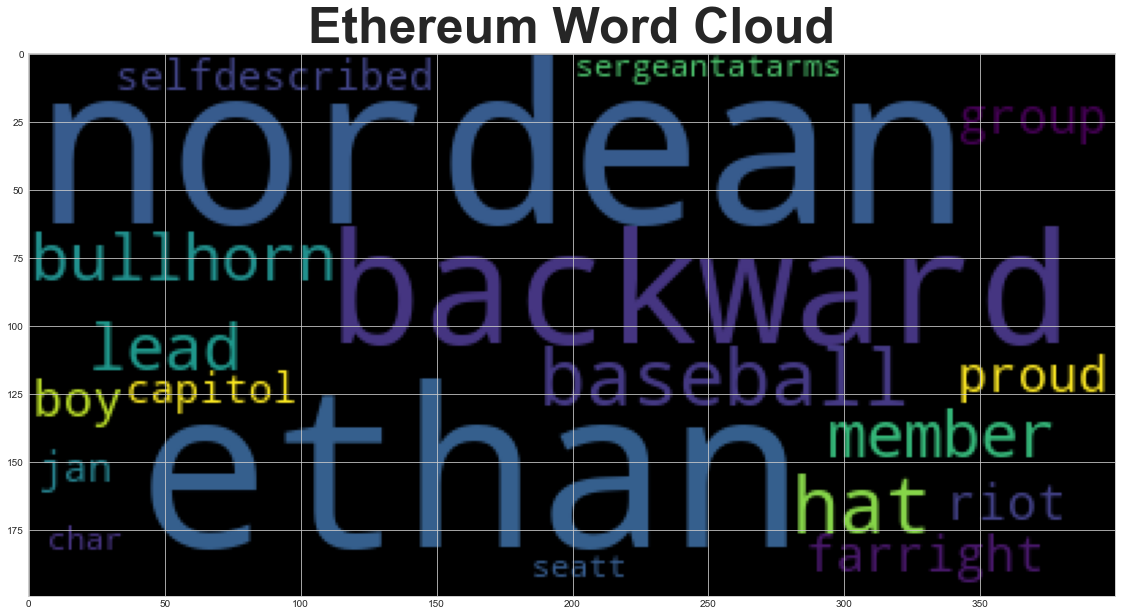

In [114]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [115]:
import spacy
from spacy import displacy

In [116]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [117]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [118]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_df['content'])
btc_content

TypeError: sequence item 6: expected str instance, NoneType found

In [119]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

NameError: name 'btc_content' is not defined

In [120]:
# Render the visualization
displacy.render(doc, style='ent')

NameError: name 'doc' is not defined

In [121]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

NameError: name 'doc' is not defined

---

### Ethereum NER

In [122]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_df['content'])
eth_content

'Ethan Nordean, with backward baseball hat and bullhorn, leads members of the far-right group Proud Boys before the riot at the U.S. Capitol on Jan. 6. The self-described sergeant-at-arms of the Seatt… [+10403 chars]'

In [123]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [124]:
# Render the visualization
displacy.render(doc, style='ent')

In [125]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Ethan Nordean PERSON
Proud Boys PERSON
U.S. GPE
Jan. 6 DATE
Seatt PERSON


---